In [31]:
import pandas as pd
import numpy as np
from process_data import load_data, pre_process_data
import matplotlib.pyplot as plt
np.random.seed(10) # Set a seed to make our results reproducible

In [38]:
X_train = pd.read_csv('german_credit_train.csv', sep=",")
X_test = pd.read_csv('german_credit_test.csv', sep=",")

y_train = X_train['Creditability']
y_test = X_test['Creditability']


# Preprocess the data set
X_train = pre_process_data(X_train)
# Drop the 'Age (years) column'
X_train = X_train.drop(columns=['Age (years)'])

# Create dummy variables using the DictVectorizer class 
dv = DictVectorizer(sparse=False)
dv = dv.fit(X_train.to_dict('records'))

dummy_train = dv.transform(X_train.to_dict('records'))
cols = dv.get_feature_names()

# Convert the data back to data frame
dummy_train = pd.DataFrame(dummy_train, index=X_train.index, columns=cols)
new_cols = {}
for key in cols:
    new_cols[key] = key.replace('=', '_')

dummy_train = dummy_train.rename(columns=new_cols)

In [39]:
# Training the model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=12, class_weight='balanced').fit(dummy_train, y_train)

In [40]:
# Preparing test data
X_test = pre_process_data(X_test)
X_test = X_test.drop(columns=['Age (years)'])
dummy_test = dv.transform(X_test.to_dict('records'))
cols = dv.get_feature_names()

# Convert the data back to data frame
dummy_test = pd.DataFrame(dummy_test, index=X_test.index, columns=cols)
new_cols = {}
for key in cols:
    new_cols[key] = key.replace('=', '_')

dummy_test = dummy_test.rename(columns=new_cols)

[[190  86]
 [ 35  89]]


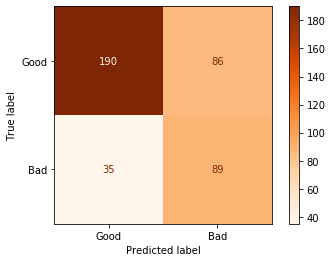

In [41]:
y_preds = classifier.predict(dummy_test)

from sklearn.metrics import plot_confusion_matrix, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_preds, labels=[1, 0])

print(conf_matrix)

class_names = ['Good', 'Bad']
disp = plot_confusion_matrix(classifier, dummy_test, 
                             y_test, display_labels=class_names, 
                             cmap=plt.cm.Oranges, 
                             normalize=None, values_format='.0f', labels=[1, 0])

In [42]:
# Saving the model to disk, for later use
import pickle

with open('credit_model.pkl', 'wb') as stream:
    pickle.dump(classifier, stream)

In [25]:
features_dictionary = {'Account Balance': ['NoAccount', 'NoBalance', 'SomeBalance'], 
                       'Payment Status': ['NoProblem', 'SomeProblems'], 
                       'Savings/Stock Value':['AboveThousand', 'BellowHundred', 'NoSavings','Other'], 
                       'Employment Length': ['AboveSevent', 'BellowOneYear', 'FourToSevent', 'OneToFour'],
                       'Sex & Marital Status':['Female', 'MaleMarried', 'MaleSingle'], 
                       'NumberCredits': ['One', 'OnePlus'], 
                       'Guarantors': ['No','Yes'],
                       'Concurrent Credits': ['NoCredit', 'OtherBanks'], 
                       'Purpose':['HouseRelated', 'NewCar', 'Other', 'UsedCar'], 
                       'AgeGroups':['MidAgeAdult', 'OldAdult', 'Senior', 'Young']
                      }

features = {'Account Balance': 'NoAccount', 
            'Payment Status': 'SomeProblems', 
            'Savings/Stock Value':'Other', 
            'Employment Length': 'BellowOneYear',
            'Sex & Marital Status': 'MaleSingle', 
            'NumberCredits': 'OnePlus', 
            'Guarantors': 'Yes',
            'Concurrent Credits': 'OtherBanks', 
            'Purpose':'Other', 
            'AgeGroups':'Senior'
           }



def get_dummy_features(features):
    """
    Create dummy features from a feature dictionary
    """
    features_dictionary = {'Account Balance': ['NoAccount', 'NoBalance', 'SomeBalance'], 
                       'Payment Status': ['NoProblem', 'SomeProblems'], 
                       'Savings/Stock Value':['AboveThousand', 'BellowHundred', 'NoSavings','Other'], 
                       'Employment Length': ['AboveSevent', 'BellowOneYear', 'FourToSevent', 'OneToFour'],
                       'Sex & Marital Status':['Female', 'MaleMarried', 'MaleSingle'], 
                       'NumberCredits': ['One', 'OnePlus'], 
                       'Guarantors': ['No','Yes'],
                       'Concurrent Credits': ['NoCredit', 'OtherBanks'], 
                       'Purpose':['HouseRelated', 'NewCar', 'Other', 'UsedCar'], 
                       'AgeGroups':['MidAgeAdult', 'OldAdult', 'Senior', 'Young']
                      }
    
    dummy_features = {}
    for key in features.keys():
        for cat in features_dictionary[key]:
            if cat == features[key]:
                dummy_features['{}_{}'.format(key, cat)] = [1]
            else:
                dummy_features['{}_{}'.format(key, cat)] = [0]
            
    return dummy_features


# get_dummy_features(features)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=12, class_weight='balanced').fit(X_train, y_train)

In [28]:
classifier.predict(pd.DataFrame(get_dummy_features(features)))[0]

0

In [31]:
import pickle
with open('./webservice/static/credit_model.pkl', 'wb') as stream:
    pickle.dump(classifier, stream)

In [ ]:
curl --request POST http://ec2-18-133-194-125.eu-west-2.compute.amazonaws.com:5000/api/v1/credit-rating --header 'Content-Type: application/json' --data '{"Account Balance": "NoAccount", "Payment Status": "SomeProblems", "Savings/Stock Value": "Other", "Employment Length": "BellowOneYear", "Sex & Marital Status": "MaleSingle", "NumberCredits": "OnePlus", "Guarantors": "Yes", "Concurrent Credits": "OtherBanks", "Purpose":"Other", "AgeGroups":"Senior"}' -s

In [ ]:
sudo amazon-linux-extras install docker
sudo service docker start
sudo usermod -a -G docker ec2-user

In [6]:
df = pd.read_csv('german_credit.csv', sep=",")
train_df, test_df = train_test_split(df, test_size=0.40, random_state=412)

In [7]:
train_df.to_csv('german_credit_train.csv', index=False)
test_df.to_csv('german_credit_test.csv', index=False)

In [9]:
test_df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
509,1,1,6,2,0,1203,2,5,3,3,...,2,2,43,3,2,1,3,1,2,1
825,0,2,6,3,0,1209,1,1,4,3,...,4,2,47,3,2,1,4,1,2,1
808,0,1,24,2,2,3345,1,5,4,3,...,2,2,39,3,1,1,4,1,2,1
503,1,4,24,4,5,2058,1,3,4,1,...,2,1,33,3,2,2,3,1,2,1
19,1,4,11,4,0,7228,1,3,1,3,...,4,2,39,3,2,2,2,1,1,1


In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, FunctionTransformer

from sklearn.pipeline import Pipeline

class PreProcessData(TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):    
        return pre_process_data(X)
    

PreProcessData = FunctionTransformer(pre_process_data)
    
    
class DummyTransformer(TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        Xdict = X.to_dict('records')
        self.dv = DictVectorizer(sparse=False)
        self.dv.fit(Xdict)
        return self

    def transform(self, X):
        Xdict = X.to_dict('records')
        Xt = self.dv.transform(Xdict)
        cols = self.dv.get_feature_names()
        Xdum = pd.DataFrame(Xt, index=X.index, columns=cols)
        new_cols = {}
        for key in cols:
            new_cols[key] = key.replace('=', '_')
        return Xdum.rename(columns=new_cols)
    

class DFStandardScaler(TransformerMixin):
    
    def __init__(self):
        self.ss = None

    def fit(self, X, y=None):
        self.ss = StandardScaler().fit(X)
        return self

    def transform(self, X):
        Xss = self.ss.transform(X)
        Xscaled = pd.DataFrame(Xss, index=X.index, 
                               columns=X.columns)
        return Xscaled
    
class DropColumns(TransformerMixin):

    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xcols = X.drop(columns=self.cols) 
        return Xcols
    
X_train = pd.read_csv('german_credit_train.csv', sep=",")
X_test = pd.read_csv('german_credit_test.csv', sep=",")

y_train = X_train['Creditability']

In [63]:
COLUMNS_TO_DROP = ['Age (years)']


model_pipeline = Pipeline(steps=[('pre_process_data', PreProcessData), 
                                 ('drop_columns', DropColumns(COLUMNS_TO_DROP)), 
                                 ('dummies',DummyTransformer()), 
                                 ('scale', DFStandardScaler()),
                                 ('logistic_regression', LogisticRegression(random_state=12, class_weight='balanced'))
                                 ])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre_process_data',
                 FunctionTransformer(func=<function pre_process_data at 0x00000223D24A1620>)),
                ('drop_columns',
                 <__main__.DropColumns object at 0x00000223D578C8D0>),
                ('dummies',
                 <__main__.DummyTransformer object at 0x00000223D578C978>),
                ('scale',
                 <__main__.DFStandardScaler object at 0x00000223D578C7F0>),
                ('logistic_regression',
                 LogisticRegression(class_weight='balanced', random_state=12))])

In [64]:
predictions  = model_pipeline.predict(X_test)
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
conf_matrix = confusion_matrix(X_test['Creditability'], predictions, labels=[1, 0])


conf_matrix

array([[190,  86],
       [ 35,  89]], dtype=int64)

In [58]:
X_train.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,4,18,4,2,1817,1,3,4,2,...,2,4,28,3,2,2,3,1,1,1
1,1,4,24,2,3,1278,1,5,4,3,...,1,1,36,3,2,1,4,1,2,1
2,1,2,12,4,1,1860,1,1,4,3,...,2,3,34,3,2,2,4,1,2,1
3,1,2,24,3,9,6967,2,4,4,3,...,4,3,36,3,1,1,4,1,2,1
4,1,3,36,2,3,3919,1,3,2,3,...,2,1,23,3,2,1,3,1,2,1
